{'dist_std': tensor(0.1399), 'entropy_ratio': tensor(0.8638), 'weights_std': tensor(0.0181)}


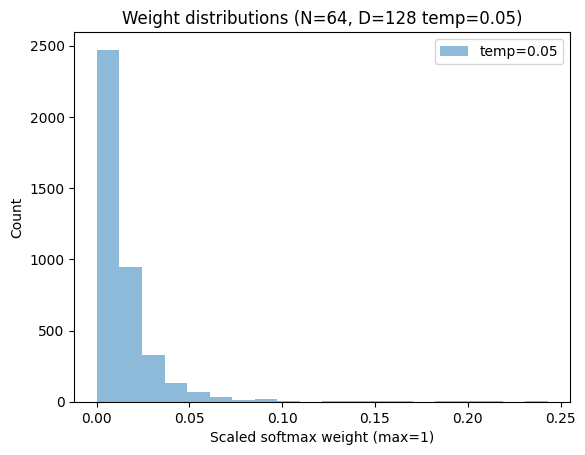

{'dist_std': tensor(0.1332), 'entropy_ratio': tensor(0.9321), 'weights_std': tensor(0.0115)}


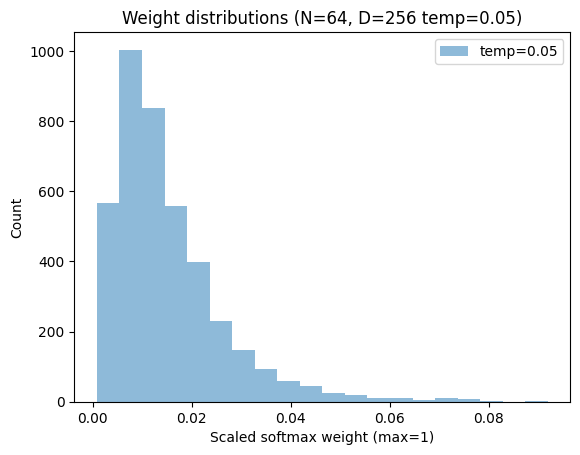

{'dist_std': tensor(0.1297), 'entropy_ratio': tensor(0.9609), 'weights_std': tensor(0.0083)}


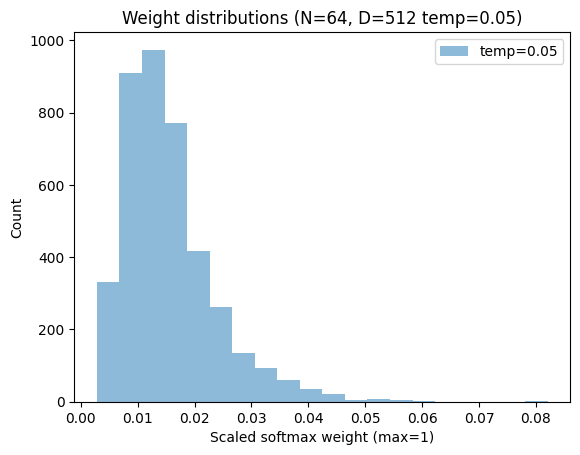

{'dist_std': tensor(0.1279), 'entropy_ratio': tensor(0.9788), 'weights_std': tensor(0.0059)}


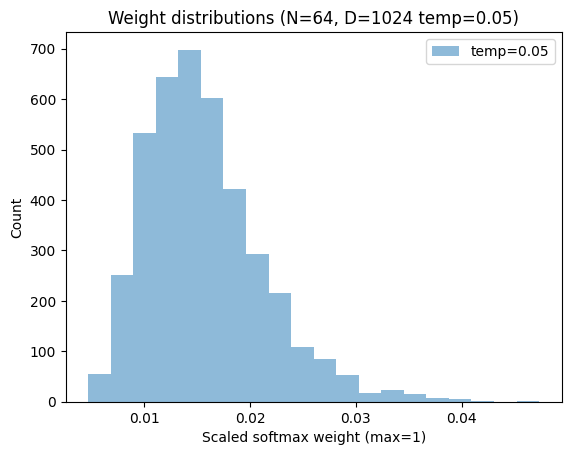

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

use_softmax = True
do_transpose = True
def simulate_softmax_weights(N=150, D=512, temp=0.2, seed=0):
    """
    Simulate distances in high dimensions, normalize mean distance to 1,
    apply softmax with temperature temp, and return normalized weights.
    """
    x = torch.randn(N, D)
    dist = torch.cdist(x, x)
    dist = dist / dist.mean()
    info = {"dist_std": dist.std()}
    dist = dist + torch.eye(dist.shape[0]) * 1e3
    weights = torch.softmax(-dist / temp, dim=1) if use_softmax else torch.exp(-dist / temp)
    info['entropy_ratio'] = (-weights * torch.log(weights + 1e-6)).sum(dim=-1).mean() / torch.log(torch.tensor(N))
    weight_2 = torch.softmax(-dist / temp, dim=0) if use_softmax else torch.exp(-dist / temp)
    weights = (weights * weight_2).sqrt() if do_transpose else weights
    info["weights_std"] = weights.std()
    return weights, info

# def plot_weight_distributions(N=150, D=512, temps=[0.05, 0.1, 0.2, 0.5], bins=20):
#     plt.figure(figsize=(12, 8))
#     for temp in temps:
#         weights = simulate_softmax_weights(N, D, temp).numpy()
#         plt.hist(weights, bins=bins, alpha=0.5, label=f"temp={temp}")
#     plt.xlabel("Scaled softmax weight (max=1)")
#     plt.ylabel("Count")
#     plt.title(f"Weight distributions (N={N}, D={D})")
#     plt.legend()
#     plt.show()

N = 64
D = 128
for D in [128, 256, 512, 1024]:
    for temp in [0.05]:
        weights, info = simulate_softmax_weights(N, D, temp)
        print(info)
        # remove diagonal entries
        mask = ~np.eye(weights.shape[0], dtype=bool)
        weights_no_diag = weights[mask]
        plt.hist(weights_no_diag.flatten(), bins=20, alpha=0.5, label=f"temp={temp}")
        plt.xlabel("Scaled softmax weight (max=1)")
        plt.ylabel("Count")
        plt.title(f"Weight distributions (N={N}, D={D} temp={temp})")
        plt.legend()
        plt.show()